<a href="https://colab.research.google.com/github/cromatical/GwangJu-AI/blob/master/%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9Dipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples = 150, # 무작위 데이터 생성, 각각의 속성값들은 어떠한 데이터르 생성할 것인지 설정
                  n_features = 2, # 2차원
                  centers = 3, # 3개의 클러스터 or 중심
                  cluster_std = 0.5, # 클러스터의 표준편차값
                  shuffle = True, # 무작위
                  random_state = 0) # 시드값

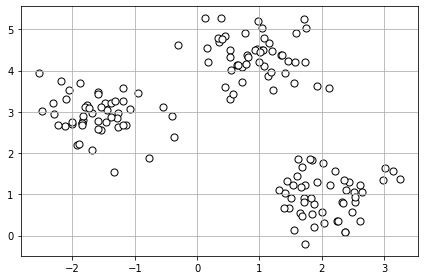

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0],
            x[:,1],
            c = 'white',
            marker = 'o',
            edgecolor = 'black',
            s = 50)
plt.grid()
plt.tight_layout()
plt.show()

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, # k평균 알고리즘 설정
            init = 'random', # 초기 중심 좌표를 무작위로 선정한다
            n_init = 10, # 각 개체별로 독립적으로 몇번을 실행시켜 가장낮은 오차값을 가지는지 설정 그중 가장 낮은 값을 가지는 모델을 선택
            max_iter = 300, # 최대 몇번이나 반복적으로 수행할 것인지
            tol = 1e-04, # 허용오차값에 도달하면 종료
            random_state = 0)

y_km = km.fit_predict(x)

### 시각화 코드


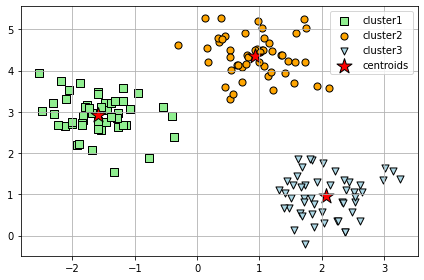

In [6]:
plt.scatter(x[y_km == 0,0],
            x[y_km == 0,1],
            s = 50,
            c = 'lightgreen',
            marker = 's',
            edgecolor = 'black',
            label = 'cluster1')

plt.scatter(x[y_km == 1,0],
            x[y_km == 1,1],
            s = 50,
            c = 'orange',
            marker = 'o',
            edgecolor = 'black',
            label = 'cluster2')

plt.scatter(x[y_km == 2,0],
            x[y_km == 2,1],
            s = 50,
            c = 'lightblue',
            marker = 'v',
            edgecolor = 'black',
            label = 'cluster3')

plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s = 250,
            c = 'red',
            marker = '*',
            edgecolor = 'black',
            label = 'centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

### K-Means++
- 기존의 K-Means 알고리즘보다 좀더 일관성있는 결과를 보여준다.



In [0]:
km = KMeans(n_clusters = 3, # 임의의 k값을 적절히 넣어줌
            init = 'k-means++', # 초기값으로 k-means++를 넣어준다. 초기 센트로이드가 멀리 떨어지도록 하는 역할을 한다.
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)

### 엘보우 방법
- 왜곡정도를 비교함으로 최적의 최적의 클러스터 개수 k를 추정

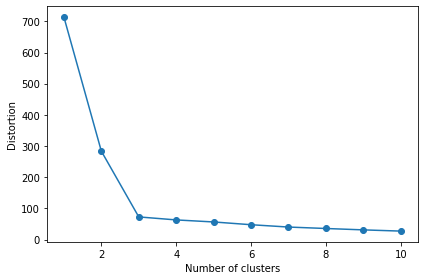

In [16]:
distortions = []

for i in range(1, 11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
  km.fit(x)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### 실루엣 그래프
- 클러스터 내 데이터들이 얼마나 조밀하게 모여있는지를 측정하는 그래프 도구 

In [0]:
from sklearn.metrics import silhouette_samples
 
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean') # (임의의 데이터셋, 이 데이터셋에 대한 예측 클러스터를 포함한 객체, 거리측정방식)